# 영상의 이진화

In [1]:
import cv2
import numpy as np
import sys

### 전역 이진화 (Trackbar 이용)

In [6]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow("dst", dst)


src = cv2.imread('./data/neutrophils.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()
    
cv2.imshow('src', src)

cv2.namedWindow("dst")
cv2.createTrackbar("threshold", "dst", 0, 255, on_threshold)
cv2.setTrackbarPos("threshold", "dst", 128)

cv2.waitKey()
cv2.destroyAllWindows()

### Workshop : hear10.jpg 로 오츠 자동임계값, cv2.THRESH_BINARY 적용

In [11]:
src = cv2.imread("./data/heart10.jpg", cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("threshold:", ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

threshold: 175.0


### 적응형 이진화 (Trackbar 이용)

In [23]:
def on_trackbar(pos):
    bsize = pos
    
    if bsize % 2 == 0:
        bsize = bsize + 1
    if bsize < 3:
        bsize = 3
        
    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, bsize, 5)
    
    cv2.imshow('dst', dst)
    
src = cv2.imread('./data/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow("dst")
cv2.createTrackbar("block size", "dst", 0, 200, on_trackbar)
cv2.setTrackbarPos("block size", "dst", 11)

cv2.waitKey()
cv2.destroyAllWindows()

# 모폴로지 연산

### 침식과 팽창

In [28]:
src = cv2.imread('./data/milkdrop.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize =(3, 3))
erode = cv2.erode(src_bin, None)
dilate = cv2.dilate(src_bin, None)
    
cv2.imshow('src', src)  
cv2.imshow('src_bin', src_bin)  
cv2.imshow('erode', erode)  
cv2.imshow('dilate', dilate)  
cv2.waitKey()
cv2.destroyAllWindows()

### 열기와 닫기

In [32]:
src = cv2.imread('./data/milkdrop.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst_open = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, None, iterations=1)
dst_close = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None, iterations=1)

cv2.imshow('src_bin', src_bin)  
cv2.imshow('open', dst_open)  
cv2.imshow('close', dst_close)  
cv2.waitKey()
cv2.destroyAllWindows()

# 레이블링과 외곽선 검출

In [ ]:
### 레이블링의 이해

In [36]:
src = np.array([[0, 0, 1, 1, 0, 0, 0, 0],
                [1, 1, 1, 1, 0, 0, 1, 0],
                [1, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 1, 1, 1, 1, 0],
                [0, 0, 0, 1, 0, 0, 1, 0],
                [0, 0, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]]).astype(np.uint8)
src

array([[0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [35]:
src = src * 255
src

array([[  0,   0, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255,   0,   0, 255,   0],
       [255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255,   0],
       [  0,   0,   0, 255, 255, 255, 255,   0],
       [  0,   0,   0, 255,   0,   0, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [37]:
cnt, labels = cv2.connectedComponents(src)

In [38]:
cnt

4

In [39]:
labels

array([[0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 2, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 3, 0],
       [0, 0, 0, 3, 3, 3, 3, 0],
       [0, 0, 0, 3, 0, 0, 3, 0],
       [0, 0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

### Workshop : circles.jpg

In [57]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

if src is None:
    print("Image load failed!")
    sys.exit()

_, src_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cnt, labels = cv2.connectedComponents(src_bin)

dst = np.zeros(src.shape, src.dtype) # 3 channels

for i in range(1, cnt):
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    
    dst[labels == i] = [b, g, r]

cv2.imshow('src', src)  
cv2.imshow('src_bin', src_bin)  
cv2.imshow('dst', dst)   
cv2.waitKey()
cv2.destroyAllWindows()

### 레이블링 응용

In [80]:
src = cv2.imread('./data/keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR) # 3차원 dst

for i in range(1, cnt): # 1~37 객체
    x, y, width, height, area = stats[i]
    if area > 20:
        cv2.rectangle(dst, (x, y), (x+width, y+height), (0, 255, 255))

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)  
cv2.imshow('dst', dst)   
cv2.waitKey()
cv2.destroyAllWindows()

### Workshop : circles.jpg 의 객체에 boungind box 를 그리고, 중심점에는 원을 그리기

In [84]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

if src is None:
    print("Image load failed!")
    sys.exit()

_, src_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

dst = np.zeros(src.shape, src.dtype) # 3 channels

for i in range(1, cnt):
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    
    dst[labels == i] = [b, g, r]
    
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0, 0, 255))
    
    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 5, (255, 0, 0), -1)
    
cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)  
cv2.imshow('dst', dst)   
cv2.waitKey()
cv2.destroyAllWindows()  

# 외곽선 검출

### 외곽선 검출과 그리기

In [97]:
src = cv2.imread('./data/contours.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

contours, hierarchy = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    
    cv2.drawContours(dst, contours, i, (b, g, r), 2)

cv2.imshow('src', src)  
cv2.imshow('dst', dst)  
cv2.waitKey()
cv2.destroyAllWindows()  

### 계층 구조를 사용한 외곽선 검출과 그리기

In [112]:
src = cv2.imread('./data/contours.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed!")
    sys.exit()

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

contours, hierarchy = cv2.findContours(src, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

idx = 0
while idx >=0:
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    
    cv2.drawContours(dst, contours, idx, (b, g, r), -1, cv2.LINE_8, hierarchy)
    idx = hierarchy[0, idx, 0]

cv2.imshow('src', src)  
cv2.imshow('dst', dst)  
cv2.waitKey()
cv2.destroyAllWindows()  

### Workshop : thums_up_down.jpg

In [167]:
src= cv2.imread('./data/thumbs_up_down.jpg')

if src is None:
    print("Image load failed!")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)    
ret, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV )

dst = np.copy(src)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(dst, contours, -1, (0, 255, 0), 3, cv2.LINE_8, hierarchy)

cv2.imshow('src', src)  
cv2.imshow('gray', gray) 
cv2.imshow('binary', binary)  
cv2.imshow('dst', dst)  
cv2.waitKey()
cv2.destroyAllWindows() 

In [177]:
left_hand = contours[1]
x, y, w, h = cv2.boundingRect(left_hand)

dst2 = np.copy(src)
cv2.rectangle(dst2, (x, y), (x+w, y+h), (0, 255, 255), 3)
cropped_image = dst2[y:y+h, x:x+w]

cv2.imshow('dst2', dst2) 
cv2.imshow('cropped_image', cropped_image)
cv2.waitKey()
cv2.destroyAllWindows() 

### k-means clustering (이미지 분할)

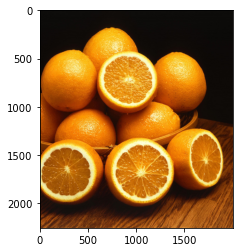

In [230]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#src = mpimg.imread('./data/monarch.jpg')
src = mpimg.imread('./data/oranges.jpg')
if src is None:
    print("Image load failed!")
    sys.exit()

plt.imshow(src)

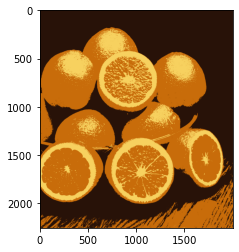

In [240]:
pixel_vals = src.reshape(-1, 3) # (2000, 3008, 3) ===> (6016000 *3)
pixel_vals = np.float32(pixel_vals)

k = 3 #TODO 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2 )
ret, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
dst  = centers[labels.flatten()]

dst = dst.reshape(src.shape)
plt.imshow(dst)

1899984 1928173 677589


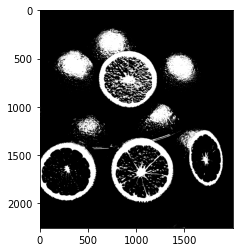

In [246]:
labels = labels.reshape(src.shape[0], src.shape[1])

print((labels==0).sum(), (labels==1).sum(), (labels==2).sum())

plt.imshow(labels==2, cmap="gray")